In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.io import arff
import scipy as sc


# Data preparation

In [2]:
# read the concat file from csv 

white_concat = pd.read_csv("white_concat")
red_concat = pd.read_csv("red_concat")


In [3]:
# Mostly re-use from Antony 
from fomlads.evaluate.eval_regression import train_and_test_partition
from fomlads.evaluate.eval_regression import train_and_test_filter

def dframe_train_test_input_target(dffeature,test_frac):
    """
    This function takes in the new data frame with the feature mapping already applied and converts
    this into training and testing inputs with a split given by the test_fraction. The function should
    output the training inputs and targets as well as the testing inputs and targets. 
    
    
    
    """
    dffeature = dffeature.drop(columns=['quality_diff'])#Dropping the quality difference column
    
    np.random.seed(1) #Setting a consistent seed 
    featurematrix = dffeature.to_numpy() #Converting the dataframe into a numpy array 
    
    columns = len(list(dffeature.columns))
    
    inputs = featurematrix[:,:(columns-1)] #We split the matrix into inputs 
    targets = featurematrix[:,columns-1] #Take the last column of the matrix as targets 
    
    train_filter,test_filter=train_and_test_filter(len(dffeature),test_frac) #Applying the training and test split for the inputs and targets using our test fraction
    
    train_inputs, train_targets, test_inputs,test_targets = train_and_test_partition(inputs,targets,train_filter,test_filter) 
    
    return train_inputs,train_targets,test_inputs,test_targets #Returning our training and testing inputs and targets
    

In [4]:
W_train_inputs,W_train_targets,W_test_inputs,W_test_targets = dframe_train_test_input_target(white_concat,0.8) #W stands for white

In [5]:
R_train_inputs,R_train_targets,R_test_inputs,R_test_targets = dframe_train_test_input_target(red_concat,0.8) #R stands for Red

# External Model


# Random Forest

In [6]:
# Random Forest 
# import, instantiate 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# instantiate the classifier with n_estimators = 10

rfc_w = RandomForestClassifier(random_state=0)
rfc_r = RandomForestClassifier(random_state=0)

# fit the model to the training set

rfc_w.fit(W_train_inputs,W_train_targets)
rfc_r.fit(R_train_inputs,R_train_targets)

# Predict on the test set results

rfc_w_predict = rfc_w.predict(W_test_inputs)
rfc_r_predict = rfc_w.predict(R_test_inputs)

# Check accuracy score 


print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(W_test_targets, rfc_w_predict)))
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(R_test_targets, rfc_r_predict)))

Model accuracy score with 10 decision-trees : 0.7756
Model accuracy score with 10 decision-trees : 0.6842


In [7]:
# instantiate the classifier with n_estimators = 100

rfc100_w = RandomForestClassifier(n_estimators=100, random_state=0)
rfc100_r = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

rfc100_w.fit(W_train_inputs,W_train_targets)
rfc100_r.fit(R_train_inputs,R_train_targets)

# Predict on the test set results

rfc100_w_predict = rfc100_w.predict(W_test_inputs)
rfc100_r_predict = rfc100_r.predict(R_test_inputs)


# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(W_test_targets, rfc100_w_predict)))
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(R_test_targets, rfc100_r_predict)))

Model accuracy score with 100 decision-trees : 0.7756
Model accuracy score with 100 decision-trees : 0.8750


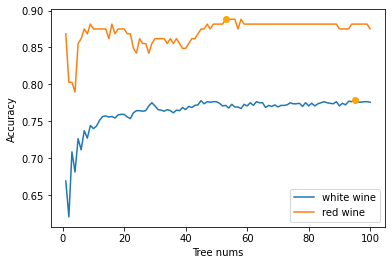

In [31]:
# find the best parameter of n_estimators
# plot the image and note the best point
def RF_ntrees(min_trees, max_trees):
    x = [x for x in range(min_trees, max_trees)]
    scores_w, scores_r = [], []
    for trees in x:
        rfc_w = RandomForestClassifier(n_estimators = trees, random_state = 0)
        rfc_r = RandomForestClassifier(n_estimators = trees, random_state = 0)
        
        rfc_w.fit(W_train_inputs,W_train_targets)
        rfc_r.fit(R_train_inputs,R_train_targets)
        
        rfc_w_predict = rfc_w.predict(W_test_inputs)
        rfc_r_predict = rfc_r.predict(R_test_inputs)
        
        scores_w.append(accuracy_score(W_test_targets, rfc_w_predict))
        scores_r.append(accuracy_score(R_test_targets, rfc_r_predict))
    
    score_max_w = max(scores_w)
    score_max_r = max(scores_r)
    
    plt.plot(x, scores_w, label = 'white wine')
    plt.plot(x, scores_r, label = 'red wine')
    plt.plot(scores_w.index(score_max_w) + 1, score_max_w, 'o', color = 'orange')
    plt.plot(scores_r.index(score_max_r) + 1, score_max_r, 'o', color = 'orange')
    plt.xlabel('Tree nums')
    plt.ylabel('Accuracy')
    plt.legend()
    
RF_ntrees(1, 101)


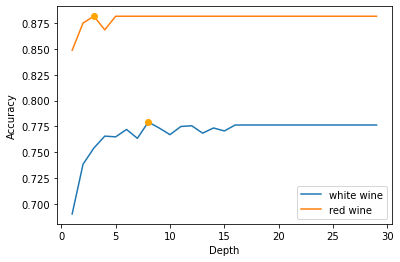

In [16]:
# find the best parameter of max_depth
# plot the image and note the best point
def RF_depth(min_depth, max_depth):
    x = [x for x in range(min_depth, max_depth)]
    scores_w, scores_r = [], []
    for depth in x:
        rfc_w = RandomForestClassifier(n_estimators = 50, max_depth = depth, random_state = 0)
        rfc_r = RandomForestClassifier(n_estimators = 50, max_depth = depth, random_state = 0)
        
        rfc_w.fit(W_train_inputs,W_train_targets)
        rfc_r.fit(R_train_inputs,R_train_targets)
        
        rfc_w_predict = rfc_w.predict(W_test_inputs)
        rfc_r_predict = rfc_r.predict(R_test_inputs)
        
        scores_w.append(accuracy_score(W_test_targets, rfc_w_predict))
        scores_r.append(accuracy_score(R_test_targets, rfc_r_predict))
    
    score_max_w = max(scores_w)
    score_max_r = max(scores_r)
    
    plt.plot(x, scores_w, label = 'white wine')
    plt.plot(x, scores_r, label = 'red wine')
    plt.plot(scores_w.index(score_max_w) + 1, score_max_w, 'o', color = 'orange')
    plt.plot(scores_r.index(score_max_r) + 1, score_max_r, 'o', color = 'orange')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.legend()
    
RF_depth(1, 30)

In [17]:
# feature scores for white wine 
feature_scores_w = pd.Series(rfc100_w.feature_importances_,index = white_concat.iloc[:,:-2].columns).sort_values(ascending=False)
feature_scores_w

citric acid_diff             0.178461
alcohol_diff                 0.106375
residual sugar_diff          0.099839
density_diff                 0.095582
fixed acidity_diff           0.086758
total sulfur dioxide_diff    0.085422
sulphates_diff               0.082382
chlorides_diff               0.077678
pH_diff                      0.070962
volatile acidity_diff        0.058457
free sulfur dioxide_diff     0.058085
dtype: float64

In [18]:
# feature scores for red wine 
feature_scores_r = pd.Series(rfc100_r.feature_importances_,index = red_concat.iloc[:,:-2].columns).sort_values(ascending=False)
feature_scores_r 

volatile acidity_diff        0.243295
alcohol_diff                 0.198943
density_diff                 0.119137
sulphates_diff               0.095628
total sulfur dioxide_diff    0.059332
citric acid_diff             0.055023
chlorides_diff               0.055022
residual sugar_diff          0.054224
free sulfur dioxide_diff     0.053591
fixed acidity_diff           0.038688
pH_diff                      0.027117
dtype: float64

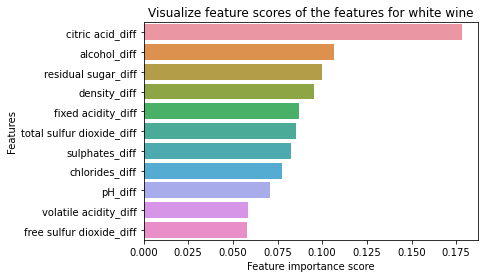

In [19]:
# Creating a seaborn bar plot for white wine 
import seaborn as sns
f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores_w, y=feature_scores_w.index)
ax.set_title("Visualize feature scores of the features for white wine")
ax.set_yticklabels(feature_scores_w.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

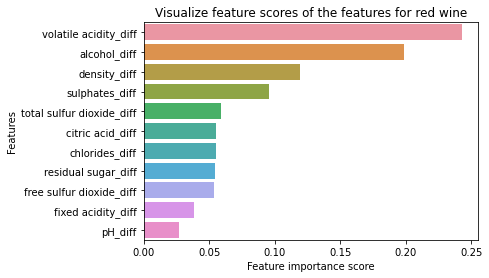

In [20]:
# Creating a seaborn bar plot for red wine 
import seaborn as sns
f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores_r, y=feature_scores_r.index)
ax.set_title("Visualize feature scores of the features for red wine")
ax.set_yticklabels(feature_scores_r.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [21]:
white_concat.head()

,alcohol_diff,chlorides_diff,citric acid_diff,density_diff,fixed acidity_diff,free sulfur dioxide_diff,pH_diff,residual sugar_diff,sulphates_diff,total sulfur dioxide_diff,volatile acidity_diff,quality_diff,Target
0,-2.2,0.003,0.02,0.00816,1.6,4.0,-0.26,13.5,0.02,92.0,-0.07,-1.0,0
1,-0.4,-0.007,0.01,0.00226,0.5,-27.0,-0.09,4.7,-0.07,-4.0,0.09,0.0,1
2,1.8,-0.010,-0.01,-0.00590,-1.1,-31.0,0.17,-8.8,-0.09,-96.0,0.16,1.0,1
3,-2.4,0.025,0.07,0.00716,1.6,18.0,-0.35,12.2,0.00,77.0,-0.01,-1.0,0
4,-0.2,0.022,0.05,-0.00100,0.0,14.0,-0.09,-1.3,-0.02,-15.0,0.06,0.0,1


In [13]:
# Test: change array to dataframe to drop the less important variable 
# Transform training inputs and targets to dataframe 
R_train_inputs_df = pd.DataFrame(R_train_inputs,columns = red_concat.iloc[:,:-2].columns)
R_train_targets_df = pd.DataFrame(R_train_targets,columns = red_concat.iloc[:,-1:].columns)

# DROP the feature pH_dff
R_train_inputs_df_drop = R_train_inputs_df.drop(['pH_diff'],axis = 1)

# Transform testing inputs to dataframe and also drop the feature 
R_test_inputs_df = pd.DataFrame(R_test_inputs,columns = red_concat.iloc[:,:-2].columns)
R_test_inputs_df_drop = R_test_inputs_df.drop(['pH_diff'],axis = 1)

# instantiate the classifier with n_estimators = 100

rfc100_r_drop = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set

rfc100_r_drop.fit(R_train_inputs_df_drop,R_train_targets_df)


# Predict on the test set results

rfc100_r_drop_predict = rfc100_r_drop.predict(R_test_inputs_df_drop)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(R_test_targets, rfc100_r_drop_predict)))




Model accuracy score with 100 decision-trees : 0.8750


In [14]:
# confusion matrix 
from sklearn.metrics import confusion_matrix

cm_w = confusion_matrix(W_test_targets, rfc100_w_predict)
cm_r = confusion_matrix(R_test_targets, rfc100_r_predict)

print('Confusion matrix for white wine \n\n', cm_w)
print('\n\nConfusion matrix for red wine \n\n', cm_r)

Confusion matrix for white wine 

 [[278 212]
 [101 804]]


Confusion matrix for red wine 

 [[ 19  16]
 [  3 114]]


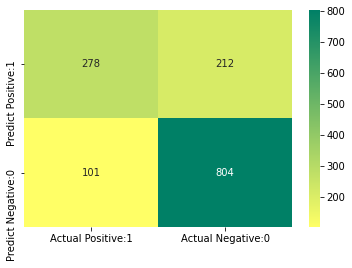

In [15]:
# Visualize confusion matrix with heatmap for white wine 

cm_matrix_w = pd.DataFrame(data=cm_w, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_w, annot=True, fmt='d',cmap = "summer_r" )


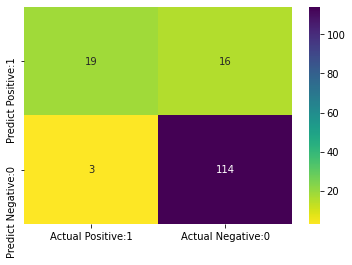

In [16]:
# Visualize confusion matrix with heatmap for red wine 

cm_matrix_r = pd.DataFrame(data=cm_r, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_r, annot=True, fmt='d',cmap = "viridis_r" )

In [17]:
# Classification Report 
from sklearn.metrics import classification_report

print("Classification Report for white wine\n\n" + classification_report(W_test_targets, rfc100_w_predict))
print("Classification Report for red wine\n\n" + classification_report(R_test_targets, rfc100_r_predict))



Classification Report for white wine

              precision    recall  f1-score   support

         0.0       0.73      0.57      0.64       490
         1.0       0.79      0.89      0.84       905

    accuracy                           0.78      1395
   macro avg       0.76      0.73      0.74      1395
weighted avg       0.77      0.78      0.77      1395

Classification Report for red wine

              precision    recall  f1-score   support

         0.0       0.86      0.54      0.67        35
         1.0       0.88      0.97      0.92       117

    accuracy                           0.88       152
   macro avg       0.87      0.76      0.79       152
weighted avg       0.87      0.88      0.86       152



# Support Vector Machine 

In [18]:
# Support Vector Machine 

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc_w=SVC() 
svc_r=SVC()


# fit classifier to training set
svc_w.fit(W_train_inputs,W_train_targets)
svc_r.fit(R_train_inputs,R_train_targets)

# make predictions on test set
svc_w_predict=svc_w.predict(W_test_inputs)
svc_r_predict=svc_r.predict(R_test_inputs)

print('Model accuracy score with default hyperparameters for white wine: {0:0.4f}'. format(accuracy_score(W_test_targets, svc_w_predict)))
print('Model accuracy score with default hyperparameters for red wine: {0:0.4f}'. format(accuracy_score(R_test_targets, svc_r_predict)))

Model accuracy score with default hyperparameters for white wine: 0.6695
Model accuracy score with default hyperparameters for red wine: 0.7566


In [24]:
# Instantite classificier with C = 100 

svc_w_100=SVC(C=100.0) 
svc_r_100=SVC(C=100.0) 


# fit classifier to training set
svc_w_100.fit(W_train_inputs,W_train_targets)
svc_r_100.fit(R_train_inputs,R_train_targets)

# make predictions on test set
svc_w_100_predict=svc_w_100.predict(W_test_inputs)
svc_r_100_predict=svc_w_100.predict(R_test_inputs)

print('Model accuracy score with C=100 for white wine: {0:0.4f}'. format(accuracy_score(W_test_targets, svc_w_100_predict)))
print('Model accuracy score with C=100 for red wine: {0:0.4f}'. format(accuracy_score(R_test_targets, svc_r_100_predict)))


Model accuracy score with C=100 for white wine: 0.6946
Model accuracy score with C=100 for red wine: 0.7697


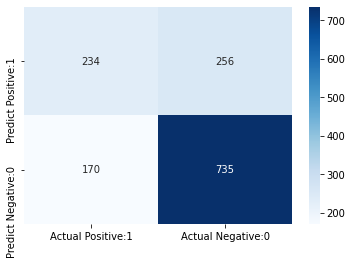

In [20]:
# Visualize confusion matrix with heatmap for SVC (white wine)

cm_svc_w = confusion_matrix(W_test_targets, svc_w_100_predict)
cm_svc_r = confusion_matrix(R_test_targets, svc_r_100_predict)


cm_matrix_svc_w = pd.DataFrame(data=cm_svc_w, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])


sns.heatmap(cm_matrix_svc_w, annot=True, fmt='d',cmap = "Blues")

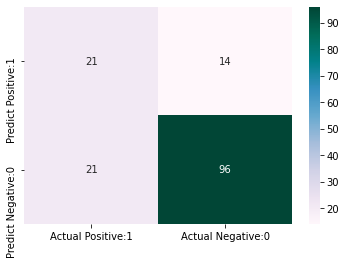

In [21]:
# Visualize confusion matrix with heatmap for SVC (red wine)
cm_matrix_svc_r = pd.DataFrame(data=cm_svc_r, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_svc_r, annot=True, fmt='d',cmap = "PuBuGn")

In [22]:

print("Classification Report for white wine\n\n" + classification_report(W_test_targets, svc_w_100_predict))
print("Classification Report for red wine\n\n" + classification_report(R_test_targets, svc_r_100_predict))


Classification Report for white wine

              precision    recall  f1-score   support

         0.0       0.58      0.48      0.52       490
         1.0       0.74      0.81      0.78       905

    accuracy                           0.69      1395
   macro avg       0.66      0.64      0.65      1395
weighted avg       0.68      0.69      0.69      1395

Classification Report for red wine

              precision    recall  f1-score   support

         0.0       0.50      0.60      0.55        35
         1.0       0.87      0.82      0.85       117

    accuracy                           0.77       152
   macro avg       0.69      0.71      0.70       152
weighted avg       0.79      0.77      0.78       152

